<p style="font-size:30px; text-align:center">Mercedes benz greener manufacturing</p>

# Problelm description

In [ ]:
! pip install kaggle
! pip install category_encoders
! mkdir ~/.kaggle
# Place your kaggle.josn file in the files section 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c mercedes-benz-greener-manufacturing
!unzip /content/mercedes-benz-greener-manufacturing.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
mercedes-benz-greener-manufacturing.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/mercedes-benz-greener-manufacturing.zip
replace sample_submission.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: train.csv.zip           


<h1>Business Problem</h1>

---

<h2>Description</h2>
<p>source:<a href:https://www.kaggle.com/c/mercedes-benz-greener-manufacturing>MercedesBenzGreenerManufacturing</a> </p>
<p><b>Problem statement</b>: Develop machine learning models to predict the testing time required for each custom-made Mercedes Benz car using their robust testing system. By leveraging these models, gain valuable insights and optimize the entire testing process for enhanced efficiency.</p>
<p>
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.
<br>
</p>
<p>
To ensure the safety and reliability of each unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.
<br>
</p>
<p>
In this competition, Daimler is challenging Kagglers to tackle the curse of dimensionality and reduce the time that cars spend on the test bench. Competitors will work with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. Winning algorithms will contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.
</p>
<br>
<h1>Mapping business problem to machine learning problem</h1>
<h2>Existing approaches</h2>
- <a href:https://www.youtube.com/watch?v=0qHXNeuNOAE>Winners talk about the problem.</a><br>
- <a href:https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/36242#202443:~:text=The%2011th%20place%20solution>Winners solution.</a><br>
- <a href:https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-mercedes>Most Upvoted solution.</a><br>
- <a href:https://blog.goodaudience.com/stacking-ml-algorithm-for-mercedes-benz-greener-manufacturing-competition-5600762186ae>Solved using deep learning model and stacking classifier.</a>
<br>
<h2>Performance metric</h2>
- Co-efficient of determination
<br><h2>Business Constraints</h2>

- No latency requirement
- Regression problem
- Maximize R2 coefficient
- Reduce the curse of dimensionality and reduce the impact of outliers.<br>

<h2>Data overview</h2>
<p>The dataset contains two csv file</p>

- train.csv
- test.csv
    
<p>The significant observation here is that both of these files are of same size i.e, if cross validation is performed using folds. The score form one fold would be same as the 
public score in the competition. The outliers would also be more and new that the model must face apart from training set.
<br>
The traing dataset contains:</p>

- 4209 data points
- 377 features
    - Categorical features: 8
    - Constant features: 12 
    - Binary features: 356
- One target variable


---

In [ ]:
#importing libraries
! pip install xgboost
! pip install prettytable
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.decomposition import PCA
from prettytable import PrettyTable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# <h1>EDA</h1>

---

In [ ]:
#reading datasets
train_df = pd.read_csv("/content/train.csv.zip")
display(train_df.head())
test_df = pd.read_csv("/content/test.csv.zip")
display(test_df.head()) 

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


<p style="color:darkgreen;font-size:20px">It is clear that the values of the column are greater than 4209(data points). This implies that this column might contain some <b>information</b> but not just the unique id of each data point.</p>

In [ ]:
display(train_df.describe().T)
display(test_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
ID,4209.0,4205.960798,2437.608688,0.00,2095.00,4220.00,6314.00,8417.00
y,4209.0,100.669318,12.679381,72.11,90.82,99.15,109.01,265.32
X10,4209.0,0.013305,0.114590,0.00,0.00,0.00,0.00,1.00
X11,4209.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
X12,4209.0,0.075077,0.263547,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...
X380,4209.0,0.008078,0.089524,0.00,0.00,0.00,0.00,1.00
X382,4209.0,0.007603,0.086872,0.00,0.00,0.00,0.00,1.00
X383,4209.0,0.001663,0.040752,0.00,0.00,0.00,0.00,1.00
X384,4209.0,0.000475,0.021796,0.00,0.00,0.00,0.00,1.00


,count,mean,std,min,25%,50%,75%,max
ID,4209.0,4211.039202,2423.078926,1.0,2115.0,4202.0,6310.0,8416.0
X10,4209.0,0.019007,0.136565,0.0,0.0,0.0,0.0,1.0
X11,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X12,4209.0,0.074364,0.262394,0.0,0.0,0.0,0.0,1.0
X13,4209.0,0.061060,0.239468,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
X380,4209.0,0.008078,0.089524,0.0,0.0,0.0,0.0,1.0
X382,4209.0,0.008791,0.093357,0.0,0.0,0.0,0.0,1.0
X383,4209.0,0.000475,0.021796,0.0,0.0,0.0,0.0,1.0
X384,4209.0,0.000713,0.026691,0.0,0.0,0.0,0.0,1.0


<p style="color:darkgreen;font-size:20px">From the above table it is clear that the mean, standard dviation etc, of <b> ID </b> is very compared to other feature values.</p>

In [ ]:
print(f"Train data shape : {train_df.shape}")
print(f"Test data shape  : {test_df.shape}")

Train data shape : (4209, 378)
Test data shape  : (4209, 377)


<br>

---
<h3> Features with nothing but zeros as values. </h3>

In [ ]:
#Features with values nothing but zero in training dataset.
print()
print(f"Number of features in training dataset with values nothing but zero : {train_df.describe().T[train_df.describe().T['max']==0].shape[0]}")
print()
print(train_df.describe().T[train_df.describe().T['max']==0].T.columns)
train_df.describe().T[train_df.describe().T['max']==0]


Number of features in training dataset with values nothing but zero : 12

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
X11,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X93,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X107,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X233,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X235,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X268,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X289,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X290,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X293,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X297,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Checking if the above obtained zero valued features are also same in test dataset
test_df[['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347']].describe().T

,count,mean,std,min,25%,50%,75%,max
X11,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X93,4209.0,0.000475,0.021796,0.0,0.0,0.0,0.0,1.0
X107,4209.0,0.000950,0.030817,0.0,0.0,0.0,0.0,1.0
X233,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X235,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X268,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X289,4209.0,0.000475,0.021796,0.0,0.0,0.0,0.0,1.0
X290,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X293,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X297,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Features with values nothing but zero in test dataset.
print()
print(f"Number of features in test dataset with values nothing but zero : {test_df.describe().T[test_df.describe().T['max']==0].shape[0]}")
print()
print(test_df.describe().T[test_df.describe().T['max']==0].T.columns)
test_df.describe().T[test_df.describe().T['max']==0]


Number of features in test dataset with values nothing but zero : 5

Index(['X257', 'X258', 'X295', 'X296', 'X369'], dtype='object')


,count,mean,std,min,25%,50%,75%,max
X257,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X258,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X295,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X296,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X369,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Checking if the above obtained zero valued features are also same in train dataset
train_df[['X257', 'X258', 'X295', 'X296', 'X369']].describe().T

,count,mean,std,min,25%,50%,75%,max
X257,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X258,4209.0,0.002376,0.048691,0.0,0.0,0.0,0.0,1.0
X295,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X296,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X369,4209.0,0.000475,0.021796,0.0,0.0,0.0,0.0,1.0


<p style='color:darkgreen'>The features that are zero valued in train are not the same in test dataset and vice-versa.</p>

<br>

---
<h3>Checking for null values</h3>

In [ ]:
print(f"Number of features with null values in train dataset : {train_df.isnull().any().sum()}")
print(f"Number of features with null values in test dataset  : {test_df.isnull().any().sum()}")


Number of features with null values in train dataset : 0
Number of features with null values in test dataset  : 0


<br>

---
<h3>Cheking for duplicates</h3>

In [ ]:
display(train_df[train_df.duplicated()])
print(f"There are {train_df.duplicated().sum()} duplicated rows.")

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


There are 0 duplicated rows.


<br>

---
<h3>Analysis of target variable</h3>

In [ ]:
train_df['y']

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

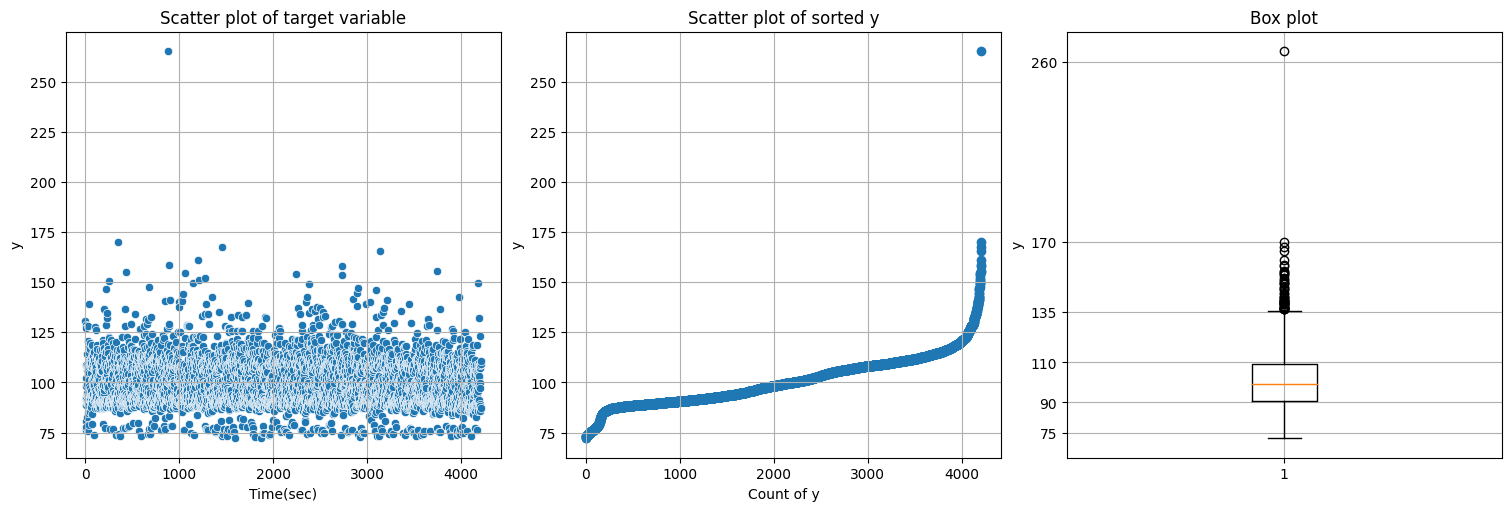

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,5), constrained_layout=True)
sns.scatterplot(data=train_df, x=np.arange(len(train_df)), y=train_df.y, ax=ax[0])
ax[0].set(xlabel="Time(sec)", title="Scatter plot of target variable")
ax[0].grid()

ax[1].scatter(range(1, len(train_df)+1), np.sort(train_df["y"].values))
ax[1].set(xlabel="Count of y", ylabel='y', title="Scatter plot of sorted y")
ax[1].grid()

da = [75, 90, 110, 135, 170, 260]
ax[2].boxplot(np.sort(train_df['y'].values))
ax[2].set(ylabel="y", title="Box plot")
ax[2].grid(axis='y')
ax[2].set_yticks(da, minor=False)
ax[2].grid(True, which='major')
plt.show()

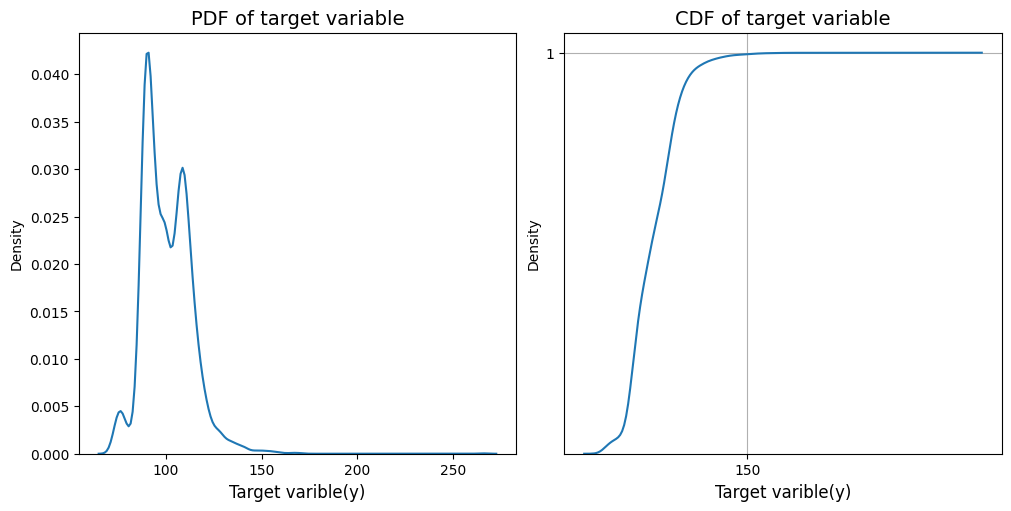

In [ ]:
#Plotting pdf and cdf of target variable
fig, ax = plt.subplots(1,2, figsize=(10,5), constrained_layout=True)

sns.kdeplot(train_df['y'], ax=ax[0])
ax[0].set_xlabel("Target varible(y)", fontsize=12)
ax[0].set_ylabel("Density")
ax[0].set_title("PDF of target variable", fontsize=14)


sns.kdeplot(train_df['y'], ax=ax[1], cumulative=True)
ax[1].set_xlabel("Target varible(y)", fontsize=12)
ax[1].set_ylabel("Density")
ax[1].set_title("CDF of target variable", fontsize=14)
ax[1].set_yticks([1])
ax[1].set_xticks([150])
ax[1].grid()

plt.show()

- <p>From CDF it is evident that almost $99\%$ of data is below $150$sec.</p>

In [ ]:
for i in np.arange(90, 101):
    print(i, ':', np.percentile(np.sort(train_df.y.values), i))

90 : 115.25
91 : 116.04840000000002
92 : 116.89160000000001
93 : 118.0376
94 : 119.056
95 : 120.806
96 : 122.4
97 : 125.89319999999998
98 : 129.2992
99 : 137.43040000000002
100 : 265.32


- <p style="color:darkgreen"> From the above two cells(scatter plots, percentiles), it is clear that all the points that are above 130 or 140 are outliers. 
    
- <p style="color:darkgreen"> Even the 99th percentile is @137.4 seconds.

In [ ]:
co = 0
for i in train_df["y"].values:
    if i > 137:
        co += 1
print(co)

45


In [ ]:
(45/4209)*100

1.069137562366358

In [ ]:
for i in np.arange(99, 100.1, 0.1):
    print(i, ':', np.percentile(np.sort(train_df.y.values), i))

99.0 : 137.43040000000002
99.1 : 139.09024
99.19999999999999 : 140.18359999999993
99.29999999999998 : 140.81639999999993
99.39999999999998 : 142.64799999999966
99.49999999999997 : 146.2303999999969
99.59999999999997 : 149.03743999999926
99.69999999999996 : 151.42767999999768
99.79999999999995 : 154.68695999999912
99.89999999999995 : 160.3832799999945
99.99999999999994 : 265.31999999973965


- <p style="color:darkgreen"> 
Zooming into 99th percentile reveals that data point with value 265 sec is far away from all the remaining data points.
</p>

- <p style="color:darkgreen">
All the data points until the value 160 sec are all close.
Therefore 160 sec should be the threshold to identify outliers.
</p>

<br>
<br>

---- 

<h3>Analysing categorical variables</h3>

In [ ]:
categorical_features = list(train_df.drop('y', axis=1).select_dtypes(exclude='int').columns)
print(f"Categorical features: {categorical_features}")

Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [ ]:
#Cocatenating all categorival features vertically
categories = []
for i in train_df.drop(['y'], axis=1).select_dtypes(exclude='int').columns:
    categories = categories+list(train_df[i].values)

In [ ]:
# Occurences of categories
value, counts = np.unique(np.array(categories), return_counts=True)
val_cou = dict(zip(list(value), list(counts)))

In [ ]:
#Sorting categories based on occurences
val_cou = dict(sorted(val_cou.items(), key=lambda x:x[1]))

In [ ]:
print(f"Total no. of categories: {len(list(val_cou.keys()))}")

Total no. of categories: 54


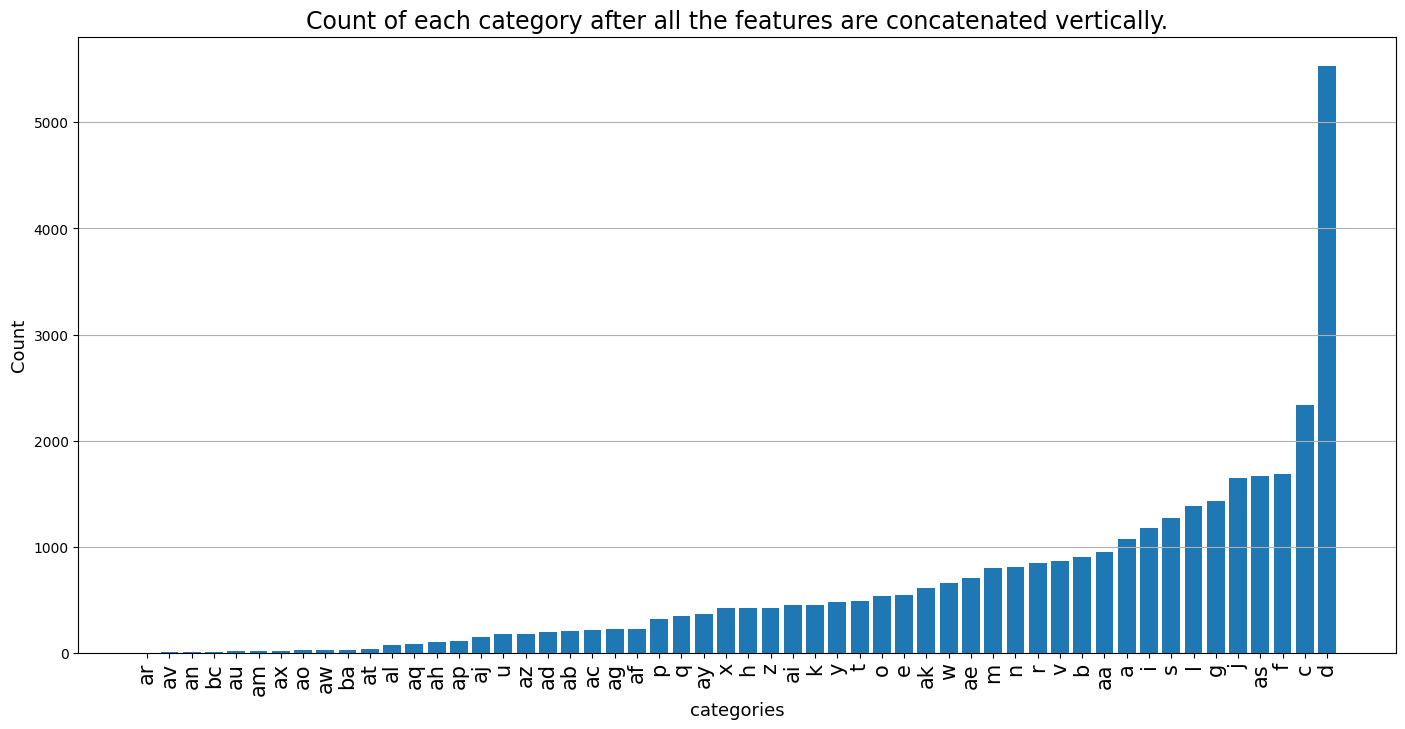

In [ ]:
plt.figure(figsize=(17,8))
plt.bar(list(val_cou.keys()), list(val_cou.values()))
plt.xticks(rotation=90, fontsize=15)
plt.grid(axis='y')
plt.xlabel('categories', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title("Count of each category after all the features are concatenated vertically.", fontsize=17)
plt.show()

In [ ]:
val_cou['d']

5531

<p style="color:darkgreen">In all the features category $\textbf{d}$ is most occured(i.e 5531 occurences).</p>

In [ ]:
from itertools import product
ind = list(product([0,1,2,3],[0,1]))

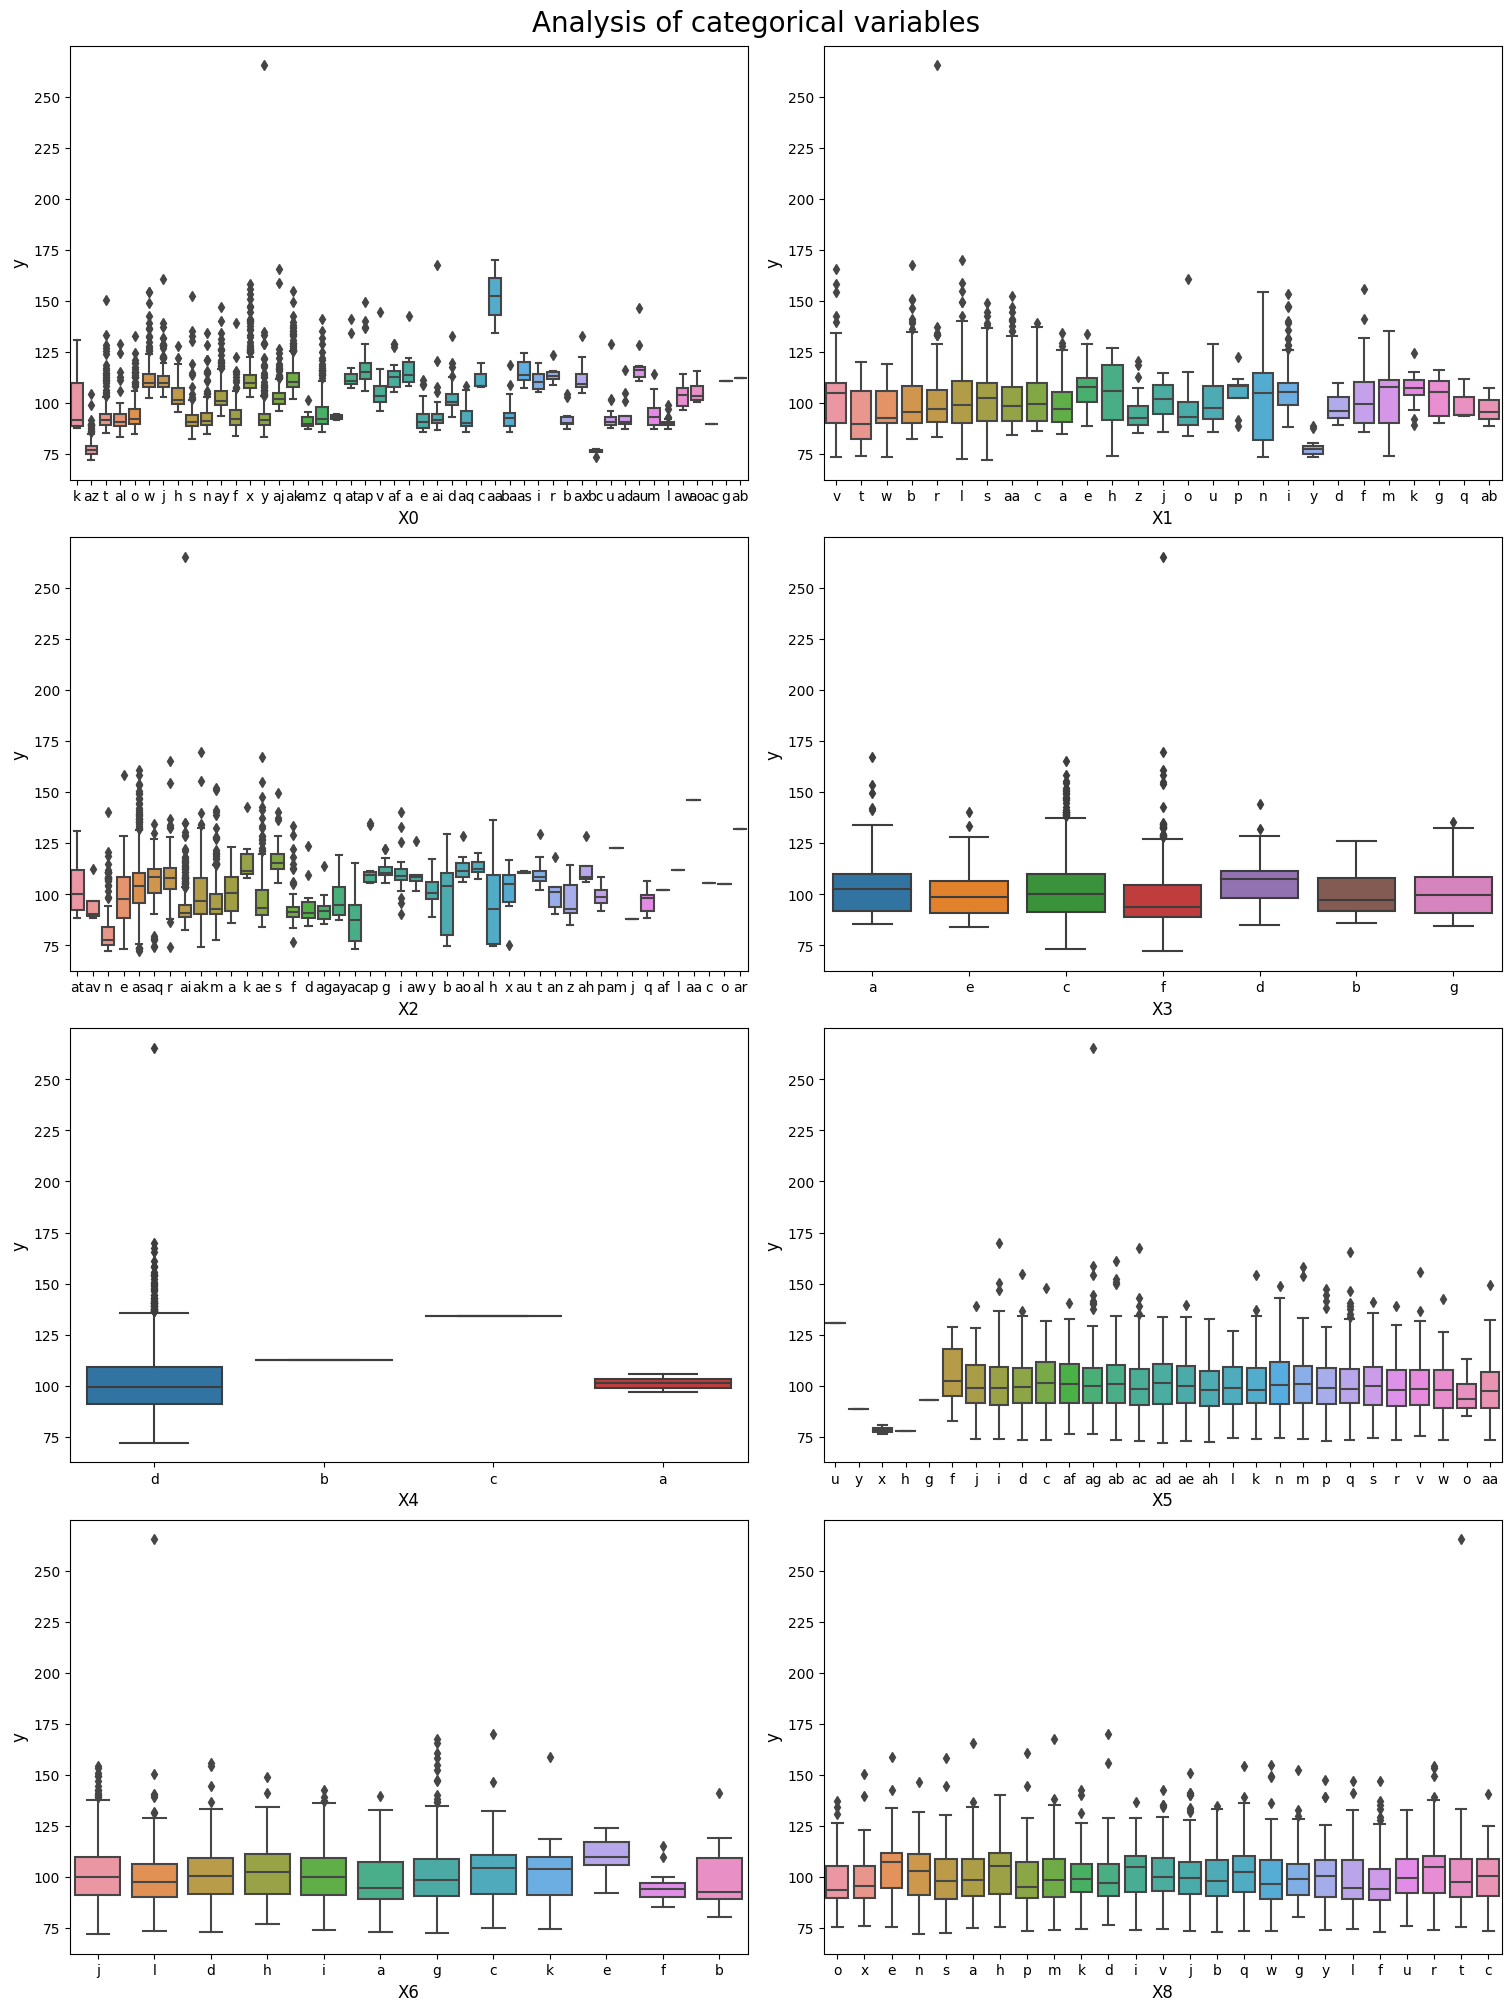

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(15,20), constrained_layout=True)
for i, j in zip(ind, categorical_features):
    sns.boxplot(data=train_df, x=j, y='y', ax=ax[i])
    ax[i].set_xlabel(f"{j}", fontsize=12)
    ax[i].set_ylabel("y", fontsize=12)
fig.suptitle('Analysis of categorical variables', fontsize=20)
plt.show()

In [ ]:
#Computing number of categories for each feature
cnt = []
for i in categorical_features:
    cnt.append(len(list(train_df[i].value_counts())))

temp = dict(zip(categorical_features, cnt))
temp = dict(sorted(temp.items(), key=lambda temp:temp[1]))

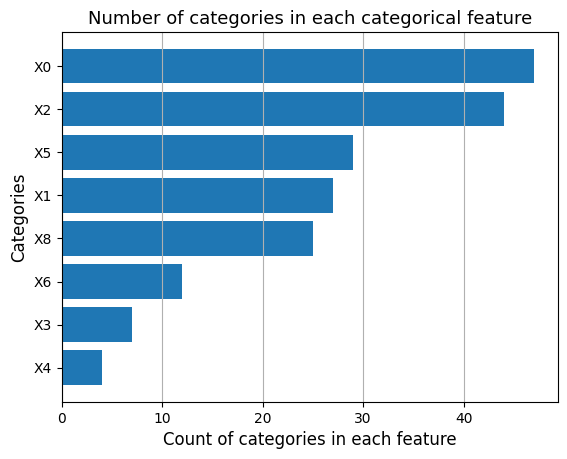

In [ ]:
plt.barh(y = list(temp.keys()), width=list(temp.values()))
plt.ylabel("Categories",fontsize=12)
plt.xlabel("Count of categories in each feature",fontsize=12)
plt.title("Number of categories in each categorical feature",fontsize=13)
plt.grid(axis='x')
plt.show()

<br>

---

<h3>Variances of features</h3>

In [ ]:
#Computing variances of all the features except ID due to scale variation
vari = dict(train_df.drop(['ID','y'], axis=1).var())
vari = dict(sorted(vari.items(), key=lambda vari:vari[1]))

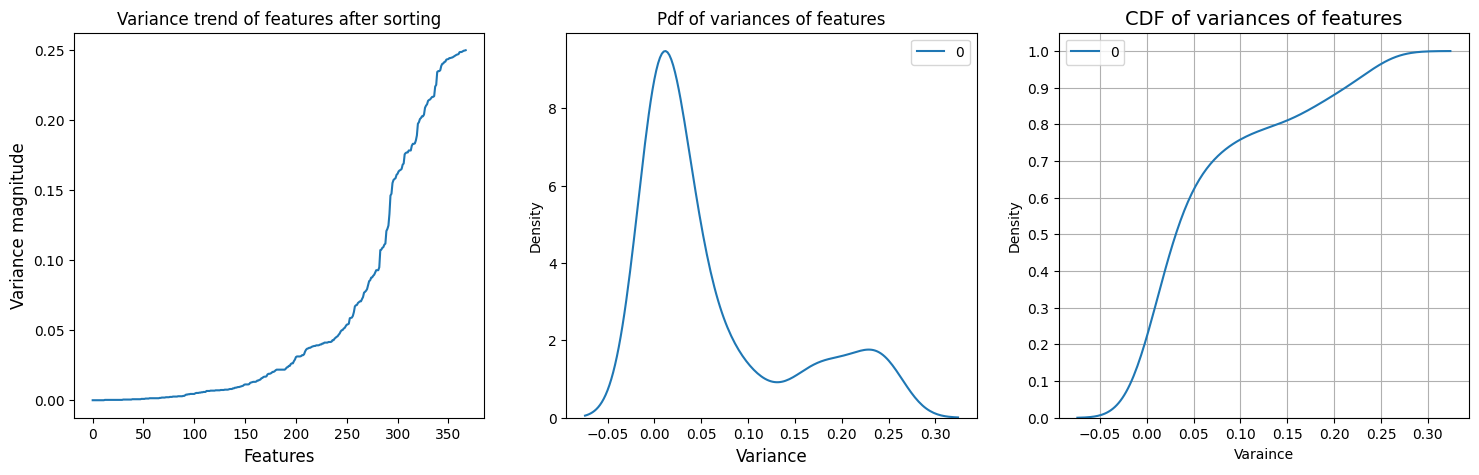

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(18,5))
ax[0].plot(list(vari.values()))
ax[0].set_ylabel('Variance magnitude', fontsize=12)
ax[0].set_xlabel('Features', fontsize=12)
ax[0].set_title("Variance trend of features after sorting", fontsize=12)

sns.kdeplot(vari.values(), ax=ax[1])
# ax[1].set_ylabel('Variance magnitude', fontsize=12)
ax[1].set_xlabel('Variance', fontsize=12)
ax[1].set_title("Pdf of variances of features", fontsize=12)

sns.kdeplot(vari.values(), cumulative=True, ax=ax[2])
ax[2].set_title('CDF of variances of features', fontsize=14)
ax[2].set_yticks([*np.arange(0,1.1,0.1)])
ax[2].set_xlabel('Varaince')
ax[2].grid()

plt.show()

In [ ]:
print(f"Maximum magnitude of variance : {max(list(vari.values()))}")
print(f"Minimum magnitude of variance : {min(list(vari.values()))}")

Maximum magnitude of variance : 0.25003568308721036
Minimum magnitude of variance : 0.0


<h3 style='color:darkgreen'>Checking the orthogonality of features with target variable (y)</h3>

In [ ]:
#Checking the orthogonality of all the numerical features with respect to target variable 
num_features = list(train_df.drop('y',axis=1).select_dtypes(include='int').columns)

orthogonal_features = []
for i in num_features:
    if np.dot(train_df[i].to_numpy(), train_df['y'].to_numpy()) == 0:
        orthogonal_features.append(i)
print(f"orthogonal_features: {orthogonal_features}")
print("""
These features are also the zero valued features and this orthogonality is trivial due zeros.\n
Apart from these there are no other features that are orthogoanl with respect to target variable.
""")

orthogonal_features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']

These features are also the zero valued features and this orthogonality is trivial due zeros.

Apart from these there are no other features that are orthogoanl with respect to target variable.



<br>

---

<h3>Co-relation(pearson) with target variable</h3>

In [ ]:
display(train_df[['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347','y']].head())
print()
#Co-relation of zero features(All the values are zero) with target variable
display(train_df[['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347','y']].corr(method='pearson')["y"])

,X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347,y
0,0,0,0,0,0,0,0,0,0,0,0,0,130.81
1,0,0,0,0,0,0,0,0,0,0,0,0,88.53
2,0,0,0,0,0,0,0,0,0,0,0,0,76.26
3,0,0,0,0,0,0,0,0,0,0,0,0,80.62
4,0,0,0,0,0,0,0,0,0,0,0,0,78.02


X11     NaN
X93     NaN
X107    NaN
X233    NaN
X235    NaN
X268    NaN
X289    NaN
X290    NaN
X293    NaN
X297    NaN
X330    NaN
X347    NaN
y       1.0
Name: y, dtype: float64

<p>The correlation of the features having zeros as data with respect to <b>y</b> is <b>NaN</b>.</p>

In [ ]:
print('The data types of these features are:')
print()
display(train_df[['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347']].dtypes)

The data types of these features are:



X11     int64
X93     int64
X107    int64
X233    int64
X235    int64
X268    int64
X289    int64
X290    int64
X293    int64
X297    int64
X330    int64
X347    int64
dtype: object

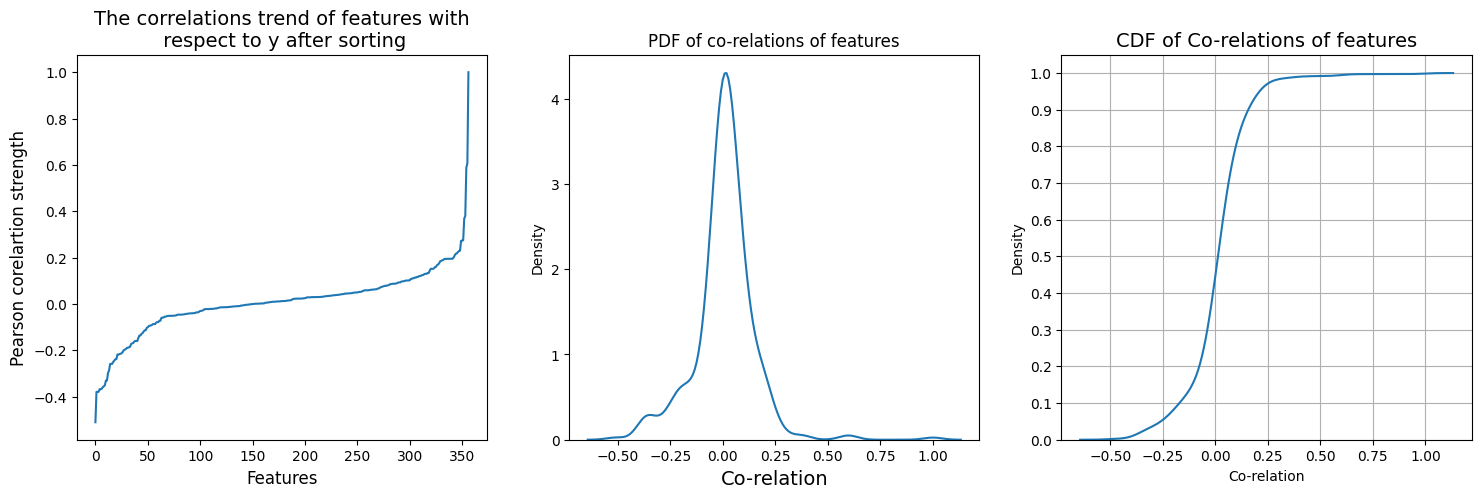

In [ ]:
#Dropping zero features and plotting correlation after sorting
cor = dict(train_df.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X339', 'X347'],axis=1).corr(method='pearson')['y'])
cor = dict(sorted(cor.items(), key=lambda x:x[1]))

fig, ax = plt.subplots(1,3, figsize=(18,5))
ax[0].plot(list(cor.values()))
ax[0].set_title("The correlations trend of features with\n respect to y after sorting", fontsize=14)
ax[0].set_ylabel("Pearson corelartion strength", fontsize=12)
ax[0].set_xlabel('Features', fontsize=12)

sns.kdeplot(list(cor.values()), ax=ax[1])
ax[1].set_xlabel("Co-relation", fontsize=14)
ax[1].set_title("PDF of co-relations of features")

sns.kdeplot(list(cor.values()), cumulative=True, ax=ax[2])
ax[2].set_title('CDF of Co-relations of features', fontsize=14)
ax[2].set_yticks([*np.arange(0,1.1,0.1)])
ax[2].set_xlabel('Co-relation')
ax[2].grid()

plt.show()

- <p>From figure there seems to have a very few features after 350th feature with a high correlation$(>0.5)$.</p>

- <p>Therefore an expectation of around 15-30 features with high feature importance from a simple ML model is valid.</p>

<br>

---
# <h1>Preprocessing</h1>

<h3>Splitting dataset into train and test datasets</h3>

In [ ]:
#Removing the outliers
train_df.drop(train_df[train_df['y'] >= 145].index, inplace = True)

x = train_df.drop(['ID'], axis=1)
# x = train_df
y = train_df['y']
#splitting the dataset into train and test datasets
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=30)

In [ ]:
print(f"X_train :{X_train.shape}")
print(f"y_train :{y_train.shape}")
print(f"X_val   :{X_val.shape}")
print(f"y_val   :{y_val.shape}")

X_train :(3349, 377)
y_train :(3349,)
X_val   :(838, 377)
y_val   :(838,)


<h3>Encoding of categorical variables</h3>

In [ ]:
def mean_encoder(feature:str, data_frame1:pd.DataFrame, data_frame2:pd.DataFrame, data_frame3:pd.DataFrame) -> pd.DataFrame:
    """
    This function encodes the categorical features based on the category of target varible mean. 
    """
    y_mean = data_frame1['y'].mean()
    if str(train_df.dtypes.loc[feature]) == 'object':
        train_mean = data_frame1.groupby(feature)['y'].mean()
        data_frame1[feature] = [train_mean.loc[i] for i in data_frame1[feature].values] #Like fitting on trraing data
        data_frame2[feature] = [train_mean.loc[i] if i in train_mean.index else y_mean for i in data_frame2[feature].values] # Like transforming based on train data.
        data_frame3[feature] = [train_mean.loc[i] if i in train_mean.index else y_mean for i in data_frame3[feature].values] # Like transforming based on train data.
    else:
        print(f"Encoding had been completed already.")

    return 0


for i in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']:
    mean_encoder(i, X_train, X_val, test_df)

In [ ]:
display(X_train.head(2))
display(X_val.head(2))

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1461,90.88,93.306870,99.991268,98.203415,100.877085,100.307648,99.192349,98.643013,98.194198,1,...,1,0,0,0,0,0,0,0,0,0
2041,88.97,94.411593,101.857953,103.424408,101.420560,100.307648,99.622581,101.302829,102.094611,0,...,1,0,0,0,0,0,0,0,0,0


,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2224,112.22,111.985594,99.991268,105.222600,101.00000,100.307648,99.599270,99.663333,100.059742,0,...,0,0,0,0,0,0,0,0,0,0
1908,132.61,93.373412,99.991268,96.241201,101.42056,100.307648,97.543014,100.681738,99.591852,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Removing traget variable from train and validation data sets.
X_train.drop('y', axis=1, inplace=True)
X_val.drop('y', axis=1, inplace=True)
display(X_train.head(2))
display(X_val.head(2))

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1461,93.306870,99.991268,98.203415,100.877085,100.307648,99.192349,98.643013,98.194198,1,0,...,1,0,0,0,0,0,0,0,0,0
2041,94.411593,101.857953,103.424408,101.420560,100.307648,99.622581,101.302829,102.094611,0,0,...,1,0,0,0,0,0,0,0,0,0


,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2224,111.985594,99.991268,105.222600,101.00000,100.307648,99.599270,99.663333,100.059742,0,0,...,0,0,0,0,0,0,0,0,0,0
1908,93.373412,99.991268,96.241201,101.42056,100.307648,97.543014,100.681738,99.591852,0,0,...,1,0,0,0,0,0,0,0,0,0


<h3>Standardizing the data</h3>

In [ ]:
# Standardizing the data to bring all features to same scale
scale = StandardScaler()
scale.fit(X_train) # Fit on x_train
# transform all datasets
x_train = scale.transform(X_train)
x_val = scale.transform(X_val)
x_test = scale.transform(test_df.drop('ID', axis=1))
# x_test = scale.transform(test_df)

In [ ]:
x_train = pd.DataFrame(data=x_train, columns=X_train.columns)
x_val = pd.DataFrame(data=x_val, columns=X_val.columns)
x_test = pd.DataFrame(data=x_test, columns=test_df.drop("ID", axis=1).columns)
# x_test = pd.DataFrame(data=x_test, columns=test_df.columns)
display(x_train.head(2))
display(x_val.head(2))
display(x_test.head(2))

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,-0.737269,-0.119285,-0.341622,0.212836,-0.018085,-0.712793,-1.265114,-0.966811,8.768336,0.0,...,1.445505,-0.252016,-0.665517,-0.142879,-0.091822,-0.090153,-0.095073,-0.029943,-0.024445,-0.042365
1,-0.621103,0.561809,0.501778,0.419801,-0.018085,-0.440405,0.743607,0.808599,-0.114047,0.0,...,1.445505,-0.252016,-0.665517,-0.142879,-0.091822,-0.090153,-0.095073,-0.029943,-0.024445,-0.042365


,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1.226874,-0.119285,0.792259,0.259644,-0.018085,-0.455164,-0.494557,-0.117643,-0.114047,0.0,...,-0.691800,-0.252016,-0.665517,-0.142879,-0.091822,-0.090153,-0.095073,-0.029943,-0.024445,-0.042365
1,-0.730271,-0.119285,-0.658598,0.419801,-0.018085,-1.757018,0.274552,-0.330620,-0.114047,0.0,...,1.445505,-0.252016,-0.665517,-0.142879,-0.091822,-0.090153,-0.095073,-0.029943,-0.024445,-0.042365


,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,-2.346825,0.277773,-2.928769,-1.548251,-0.018085,0.0,-2.388132,-0.583110,-0.114047,0.0,...,-0.6918,-0.252016,-0.665517,6.998934,-0.091822,-0.090153,-0.095073,-0.029943,-0.024445,-0.042365
1,-0.709698,-0.447577,-1.102460,0.573576,-0.018085,0.0,-0.237606,0.146249,-0.114047,0.0,...,-0.6918,-0.252016,1.502592,-0.142879,-0.091822,-0.090153,-0.095073,-0.029943,-0.024445,-0.042365


<h3>Computing feature importances using RandomForestRegressor and discarding unimportant features</h3> 

In [ ]:
# Fitting the data with RandomForestRegressor to check for feature importances
reg = RandomForestRegressor(random_state=30)
reg.fit(x_train, y_train)

RandomForestRegressor(random_state=30)

In [ ]:
f = dict(zip(reg.feature_names_in_, reg.feature_importances_))
f = dict(sorted(f.items(), key = lambda i:i[1], reverse=True))

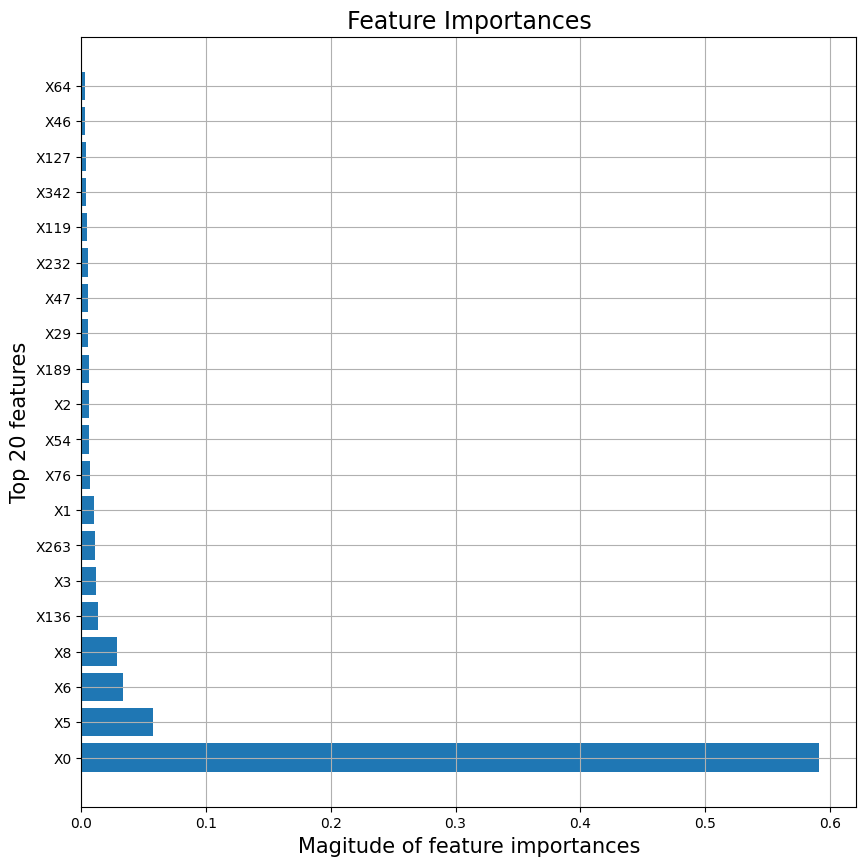

In [ ]:
plt.figure(figsize=(10, 10))
plt.barh(list(f.keys())[:20],list(f.values())[:20])
plt.grid()
plt.title("Feature Importances", fontsize=17)
plt.xlabel("Magitude of feature importances", fontsize=15)
plt.ylabel("Top 20 features", fontsize=15)
plt.show()

In [ ]:
#Features with zero/almost_zero importances
zero_imp_features = [i for i,j in f.items() if j <= 0.001]
print(f"Number of features zero importance: {len(zero_imp_features)}")

Number of features zero importance: 282


In [ ]:
# Removing features with zero importance from all datasets
x_train = x_train.drop(zero_imp_features, axis=1)
x_val = x_val.drop(zero_imp_features, axis=1)
x_test = x_test.drop(zero_imp_features, axis=1)
display(x_train.head(2))
display(x_val.head(2))
display(x_test.head(2))

,X0,X1,X2,X3,X5,X6,X8,X12,X20,X22,...,X340,X341,X342,X345,X350,X351,X354,X355,X359,X375
0,-0.737269,-0.119285,-0.341622,0.212836,-0.712793,-1.265114,-0.966811,-0.289515,-0.39752,-0.303814,...,-0.153405,-0.090153,-0.157435,-0.149276,-0.713609,-0.651072,-0.507547,1.276216,-0.183417,1.445505
1,-0.621103,0.561809,0.501778,0.419801,-0.440405,0.743607,0.808599,-0.289515,-0.39752,-0.303814,...,-0.153405,-0.090153,-0.157435,-0.149276,-0.713609,-0.651072,-0.507547,-0.783566,-0.183417,1.445505


,X0,X1,X2,X3,X5,X6,X8,X12,X20,X22,...,X340,X341,X342,X345,X350,X351,X354,X355,X359,X375
0,1.226874,-0.119285,0.792259,0.259644,-0.455164,-0.494557,-0.117643,-0.289515,-0.39752,-0.303814,...,-0.153405,-0.090153,-0.157435,-0.149276,-0.713609,1.535929,-0.507547,1.276216,-0.183417,-0.691800
1,-0.730271,-0.119285,-0.658598,0.419801,-1.757018,0.274552,-0.330620,-0.289515,-0.39752,3.291492,...,-0.153405,-0.090153,-0.157435,-0.149276,-0.713609,1.535929,-0.507547,-0.783566,-0.183417,1.445505


,X0,X1,X2,X3,X5,X6,X8,X12,X20,X22,...,X340,X341,X342,X345,X350,X351,X354,X355,X359,X375
0,-2.346825,0.277773,-2.928769,-1.548251,0.0,-2.388132,-0.583110,-0.289515,-0.39752,-0.303814,...,-0.153405,-0.090153,-0.157435,-0.149276,1.401327,-0.651072,-0.507547,-0.783566,-0.183417,-0.6918
1,-0.709698,-0.447577,-1.102460,0.573576,0.0,-0.237606,0.146249,-0.289515,-0.39752,-0.303814,...,-0.153405,-0.090153,-0.157435,-0.149276,-0.713609,-0.651072,-0.507547,-0.783566,-0.183417,-0.6918


In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(3349, 94)
(838, 94)
(4209, 94)


# <h3>Creating interacting features based on correlation</h3>

In [ ]:
from scipy.stats.stats import pearsonr
pear_below_0_1 = []
pear_above_0_1 = []
for i in x_train.columns:
    if pearsonr(x_train[i], y_train)[0] < 0.1:
        pear_below_0_1.append((i,max(pearsonr(x_train[i], y_train))))
    else:
        pear_above_0_1.append((i,max(pearsonr(x_train[i], y_train))))

In [ ]:
print("All the features with a correlation of greater than 0.1 magnitude with target varible.")
display(sorted(pear_above_0_1, key=lambda x:x[1]))

All the features with a correlation of greater than 0.1 magnitude with target varible.


[('X64', 0.10383231852180949),
 ('X142', 0.10471639184951359),
 ('X6', 0.11149451971901543),
 ('X47', 0.1157747573052525),
 ('X151', 0.11652128421840159),
 ('X336', 0.11902032640479628),
 ('X355', 0.12694453315531412),
 ('X241', 0.12698706162790535),
 ('X238', 0.12917403776868983),
 ('X354', 0.12932248038745645),
 ('X5', 0.13299540708698354),
 ('X189', 0.1367643033909162),
 ('X180', 0.14613952246926185),
 ('X68', 0.15693364291440046),
 ('X156', 0.17039912831483794),
 ('X300', 0.1786077440722885),
 ('X223', 0.18227577027007807),
 ('X8', 0.18498382528781432),
 ('X224', 0.19484849367681895),
 ('X3', 0.2211078085934298),
 ('X1', 0.23077339902958674),
 ('X51', 0.25603647002464386),
 ('X118', 0.29433706216070404),
 ('X119', 0.29433706216070404),
 ('X136', 0.4028185736746883),
 ('X263', 0.40824232058375254),
 ('X2', 0.5212441134791229),
 ('X0', 0.8007481701488222)]

In [ ]:
#Creating two way interaction features with pearson correlation coefficient of more than 0.75 with target variable(y)
two_way = []
for i in range(len(pear_above_0_1)):
    for j in range(i+1,len(pear_above_0_1)):
        if pearsonr(x_train[pear_above_0_1[i][0]]+x_train[pear_above_0_1[j][0]],y_train)[0]>(pearsonr(x_train[pear_above_0_1[i][0]], y_train)[0])+0.05 and pearsonr(x_train[pear_above_0_1[i][0]]+x_train[pear_above_0_1[j][0]],y_train)[0]>(pearsonr(x_train[pear_above_0_1[j][0]],y_train)[0])+0.05and pear_above_0_1[i][0] != pear_above_0_1[j][0]:
                    two_way.append((f"{pear_above_0_1[i][0]}_{pear_above_0_1[j][0]}",pearsonr(x_train[pear_above_0_1[i][0]]+x_train[pear_above_0_1[j][0]], y_train)[0]))
two_way

[('X1_X3', 0.3060277865946545),
 ('X1_X8', 0.283750670109849),
 ('X1_X51', 0.33161356360216043),
 ('X1_X118', 0.3484650352384751),
 ('X1_X119', 0.3484650352384751),
 ('X1_X156', 0.2838965313077413),
 ('X3_X51', 0.311428032922223),
 ('X3_X156', 0.27575754980550177),
 ('X3_X223', 0.28109896325514727),
 ('X3_X224', 0.2824291949484407),
 ('X3_X300', 0.28260119201210265),
 ('X5_X180', 0.19709204033188096),
 ('X5_X241', 0.18769011456543122),
 ('X5_X354', 0.18485089524147758),
 ('X8_X156', 0.25392715819637934),
 ('X8_X223', 0.25265208411714896),
 ('X8_X224', 0.25549425284116306),
 ('X8_X300', 0.24304381851791068),
 ('X51_X118', 0.35691750681160517),
 ('X51_X119', 0.35691750681160517),
 ('X51_X156', 0.308357994144773),
 ('X68_X156', 0.26854762567874974),
 ('X68_X189', 0.2224374604615479),
 ('X68_X224', 0.2479023880500137),
 ('X68_X238', 0.22324916270930617),
 ('X68_X300', 0.23478969143426887),
 ('X118_X300', 0.3478715451408081),
 ('X119_X300', 0.3478715451408081),
 ('X136_X223', 0.455194892860

187+355<br>
191+306<br>
75+189<br>
x136+x223<br>
x136+x223<br>

In [ ]:
#Removing all the features with pearson correlation coefficient less than 0.1

# temp = [i[0] for i in pear_below_0_1]
# x_train = x_train.drop(temp, axis=1)
# x_val = x_val.drop(temp, axis=1)
# x_test = x_test.drop(temp, axis=1)

In [ ]:
# for i in two_way:
#     x_train[i[0]] = x_train[i[0].split("_")[0]]+x_train[i[0].split("_")[1]]
#     x_val[i[0]] = x_val[i[0].split("_")[0]]+x_val[i[0].split("_")[1]]
#     x_test[i[0]] = x_test[i[0].split("_")[0]]+x_test[i[0].split("_")[1]]
# x_train['x51_x275'] = x_train['X51']+x_train['X275']
# x_val['x51_x275'] = x_val['X51']+x_val['X275']
# x_test['x51_x275'] = x_test['X51']+x_test['X275']
# x_train.drop(['X51','X275'], axis=1, inplace=True)
# x_val.drop(['X51','X275'], axis=1, inplace=True)
# x_test.drop(['X51','X275'], axis=1, inplace=True)


def two_way_feat(f1,f2):
    x_train[f"{f1}_{f2}"] = x_train[f1]+x_train[f2]
    x_val[f"{f1}_{f2}"] = x_val[f1]+x_val[f2]
    x_test[f"{f1}_{f2}"] = x_test[f1]+x_test[f2]
    x_train.drop([f1,f2], axis=1, inplace=True)
    x_val.drop([f1,f2], axis=1, inplace=True)
    x_test.drop([f1,f2], axis=1, inplace=True)

# two_way_feat('X51','X275')
# two_way_feat('X187','X355')
# two_way_feat('X191','X306')
# two_way_feat("X75","X189")

two_way_feat("X136","X223")
two_way_feat("X118","X51")
two_way_feat("X1","X3")
two_way_feat("X5","X180")
two_way_feat("X8","X224")
two_way_feat("X68","X156")
two_way_feat("X151","X355")
two_way_feat("X354","X189")
two_way_feat("X241","X238")

In [ ]:
display(x_train.head(2))
display(x_val.head(2))
display(x_test.head(2))

,X0,X2,X6,X12,X20,X22,X23,X27,X29,X31,...,X375,X136_X223,X118_X51,X1_X3,X5_X180,X8_X224,X68_X156,X151_X355,X354_X189,X241_X238
0,-0.737269,-0.341622,-1.265114,-0.289515,-0.39752,-0.303814,-0.151353,0.682852,-0.21654,-0.549636,...,1.445505,1.110941,-0.683079,0.093552,-1.136143,-1.658139,-1.905240,0.967736,-0.200229,-0.027266
1,-0.621103,0.501778,0.743607,-0.289515,-0.39752,-0.303814,-0.151353,0.682852,-0.21654,-0.549636,...,1.445505,1.110941,1.384796,0.981610,-0.863756,2.255090,0.333557,-1.092047,-0.200229,-0.027266


,X0,X2,X6,X12,X20,X22,X23,X27,X29,X31,...,X375,X136_X223,X118_X51,X1_X3,X5_X180,X8_X224,X68_X156,X151_X355,X354_X189,X241_X238
0,1.226874,0.792259,-0.494557,-0.289515,-0.39752,-0.303814,-0.151353,-1.464446,-0.21654,-0.549636,...,-0.691800,-0.901716,1.384796,0.140360,-0.878514,-0.808971,-1.905240,0.967736,-0.200229,-0.027266
1,-0.730271,-0.658598,0.274552,-0.289515,-0.39752,3.291492,-0.151353,0.682852,-0.21654,1.819387,...,1.445505,-0.901716,-2.926426,0.300517,-2.180368,-1.021948,0.333557,-1.092047,-0.200229,-0.027266


,X0,X2,X6,X12,X20,X22,X23,X27,X29,X31,...,X375,X136_X223,X118_X51,X1_X3,X5_X180,X8_X224,X68_X156,X151_X355,X354_X189,X241_X238
0,-2.346825,-2.928769,-2.388132,-0.289515,-0.39752,-0.303814,-0.151353,0.682852,4.61808,1.819387,...,-0.6918,-3.708398,-2.926426,-1.270478,-0.42335,-1.274439,-1.905240,-1.092047,-3.761504,-3.605417
1,-0.709698,-1.102460,-0.237606,-0.289515,-0.39752,-0.303814,-0.151353,0.682852,-0.21654,1.819387,...,-0.6918,-0.901716,1.384796,0.126000,-0.42335,-0.545079,0.333557,-1.092047,-0.200229,-0.027266


# ..

In [ ]:
#Fitting a RandomForestRegressor after hyperparameter tuning
rf = RandomForestRegressor(random_state=30)

parameters = {'n_estimators':[*range(10, 150, 10)],
              'max_features':['auto','sqrt'],
              'max_depth':[1, 3, 10, 30],
              'min_samples_split':[5, 10, 50, 100],
              'min_samples_leaf':[1, 3, 5, 10]}
clf = RandomizedSearchCV(estimator=rf, param_distributions=parameters, scoring="r2", random_state=30)
clf.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=30),
                   param_distributions={'max_depth': [1, 3, 10, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 10],
                                        'min_samples_split': [5, 10, 50, 100],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140]},
                   random_state=30, scoring='r2')

In [ ]:
print("Best parameters :", clf.best_params_,
      '\nBest score\t:',clf.best_score_,
      '\nBest_estimator  :', clf.best_estimator_)

Best parameters : {'n_estimators': 130, 'min_samples_split': 100, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 30} 
Best score	: 0.6407507159712135 
Best_estimator  : RandomForestRegressor(max_depth=30, max_features='auto', min_samples_leaf=3,
                      min_samples_split=100, n_estimators=130, random_state=30)


In [ ]:
rf = clf.best_estimator_
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, max_features='auto', min_samples_leaf=3,
                      min_samples_split=100, n_estimators=130, random_state=30)

In [ ]:
print(f"Coefficient of determination(R2) on train dataset :{rf.score(x_train, y_train)}")
print(f"Coefficient of determination(R2) on val dataset   :{rf.score(x_val, y_val)}")

Coefficient of determination(R2) on train dataset :0.6934422447201628
Coefficient of determination(R2) on val dataset   :0.5902708508311909


<h3>Remove features with VIF(Variance Inflation Factor) greater that 10 one at a time</h3>

In [ ]:
x_train_vif = x_train.copy()

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x_train_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train_vif.values, i)
                        for i in range(len(x_train_vif.columns))]

vif_data = vif_data.sort_values('VIF', ascending=False)

high_vif_features = []
while vif_data.head(1)["VIF"].values[0] > 10:
    high_vif_features.append(vif_data.head(1)["feature"].values[0])
    x_train_vif = x_train_vif.drop(vif_data.head(1)["feature"].values, axis=1)

    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = x_train_vif.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(x_train_vif.values, i)
    						for i in range(len(x_train_vif.columns))]
    
    vif_data = vif_data.sort_values('VIF', ascending=False)
    
print(vif_data.sort_values('VIF'))

   feature       VIF
48    X291  1.033670
29    X141  1.062439
19    X105  1.069814
10     X47  1.078063
14     X73  1.125739
..     ...       ...
55    X337  7.048196
53    X329  7.226737
15     X76  7.414586
51    X321  8.080591
31    X154  8.248204

[73 rows x 2 columns]


In [ ]:
len(high_vif_features)

12

In [ ]:
x_train_vif = x_train.drop(high_vif_features, axis=1)
x_val_vif = x_val.drop(high_vif_features, axis=1)
x_test_vif = x_test.drop(high_vif_features, axis=1)

In [ ]:
#fitting random forest regressor after removing high vif features
rf.fit(x_train_vif, y_train)

RandomForestRegressor(max_depth=30, max_features='auto', min_samples_leaf=3,
                      min_samples_split=100, n_estimators=130, random_state=30)

In [ ]:
print(f"Coefficient of determination(R2) on train dataset through RandomForestRegressor :{rf.score(x_train_vif, y_train)}")
print(f"Coefficient of determination(R2) on val dataset through RandomForestRegressor   :{rf.score(x_val_vif, y_val)}")
# y_test_pred_rf = rf.predict(x_test_vif)

Coefficient of determination(R2) on train dataset through RandomForestRegressor :0.6819253185568392
Coefficient of determination(R2) on val dataset through RandomForestRegressor   :0.5880131684887855


<p style="color:darkgreen">After removing the features with $VIF >= 10$. The R2 score hasn't changed significantly.</p>

In [ ]:
def ml_models(mod, parameters, x_train_data, y_train_data, x_val_data, y_val_data):
    """
    This function takes the model, hyperparamets, data and fits the data on the model after tuning hyperparameters with RandomizedSearchCV
    """
    clf = RandomizedSearchCV(mod,param_distributions=parameters, scoring='r2', random_state=30)
    print(clf)
    clf.fit(x_train_data, y_train_data)
    print(f"Model: {mod}")
    print("Best parameters :", clf.best_params_,
        '\nBest score\t:',clf.best_score_,
        '\nBest_estimator  :', clf.best_estimator_)
    clf.best_estimator_.fit(x_train_data, y_train_data)
    print()
    print(f"Coefficient of determination(R2) on train dataset {str(mod).split('(')[0]} : {clf.best_estimator_.score(x_train_data, y_train_data)}")
    print(f"Coefficient of determination(R2) on val dataset   {str(mod).split('(')[0]} : {clf.best_estimator_.score(x_val_data, y_val_data)}")
    return clf.best_estimator_

---
<br>

# <h1> Modelling-1 after removing HIGH VIF features</h1>

<h3>Linear regression with L2 regularization (Ridge) after VIF features removed</h3>

In [ ]:
lin_reg = Ridge(random_state=30)
alpha = {"alpha":[0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
clf = RandomizedSearchCV(lin_reg, param_distributions=alpha, scoring='r2', random_state=30).fit(x_train_vif, y_train)

In [ ]:
print("Best parameters :", clf.best_params_,
      '\nBest score\t:',clf.best_score_,
      '\nBest_estimator  :', clf.best_estimator_)

lin_reg = clf.best_estimator_
lin_reg.fit(x_train_vif, y_train)

Best parameters : {'alpha': 10} 
Best score	: 0.608771695170006 
Best_estimator  : Ridge(alpha=10, random_state=30)


Ridge(alpha=10, random_state=30)

In [ ]:
print(f"Coefficient of determination(R2) after removing high VIF features: ")
print(f"Coefficient of determination(R2) on train dataset through linear regression :{lin_reg.score(x_train_vif, y_train)}")
print(f"Coefficient of determination(R2) on val dataset through linear regression   :{lin_reg.score(x_val_vif, y_val)}")
# y_test_pred_lin_reg = lin_reg.predict(x_test_vif)

Coefficient of determination(R2) after removing high VIF features: 
Coefficient of determination(R2) on train dataset through linear regression :0.6292980063554009
Coefficient of determination(R2) on val dataset through linear regression   :0.5674825115040725


<h2>SGDRegressor</h2>

In [ ]:
parameters = {"alpha":[0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
              'epsilon':[0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

sgd_reg_vif = ml_models(SGDRegressor(random_state=30), parameters, x_train_vif, y_train, x_val_vif, y_val)
# y_test_pred_sgd_reg = sgd_reg.predict(x_test)

RandomizedSearchCV(estimator=SGDRegressor(random_state=30),
                   param_distributions={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5,
                                                  1, 5, 10],
                                        'epsilon': [0.001, 0.01, 0.05, 0.1, 0.5,
                                                    1, 5, 10]},
                   random_state=30, scoring='r2')
Model: SGDRegressor(random_state=30)
Best parameters : {'epsilon': 0.001, 'alpha': 0.5} 
Best score	: 0.544342411092335 
Best_estimator  : SGDRegressor(alpha=0.5, epsilon=0.001, random_state=30)

Coefficient of determination(R2) on train dataset SGDRegressor : 0.5622809074112011
Coefficient of determination(R2) on val dataset   SGDRegressor : 0.4934087928807751


<h2>DecisionTreeRegressor</h2>

In [ ]:
parameters = {'max_depth':[*range(1,10)],
              'min_samples_split':[*range(50,110,10)],
              "max_features":["auto", "sqrt", "log2","None"],
              "max_leaf_nodes":[*range(1,5)],
              'min_samples_leaf': [*range(1,4)],
              'min_samples_split': [*range(1,4)]}
              
dt_vif = ml_models(DecisionTreeRegressor(random_state=30), parameters, x_train_vif, y_train, x_val_vif, y_val)

RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=30),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         'None'],
                                        'max_leaf_nodes': [1, 2, 3, 4],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3]},
                   random_state=30, scoring='r2')
Model: DecisionTreeRegressor(random_state=30)
Best parameters : {'min_samples_split': 2, 'min_samples_leaf': 3, 'max_leaf_nodes': 4, 'max_features': 'auto', 'max_depth': 7} 
Best score	: 0.6107927057047362 
Best_estimator  : DecisionTreeRegressor(max_depth=7, max_features='auto', max_leaf_nodes=4,
                      min_samples_leaf=3, random_state=30)

Coefficient of determin

<h2>RandomForestRegressor</h2>

In [ ]:
parameters = {'n_estimators':[*range(10, 150, 10)],
              'max_features':['auto','sqrt'],
              'max_depth':[1, 3, 10, 30],
              'min_samples_split':[5, 10, 50, 100],
              'min_samples_leaf':[1, 3, 5, 10]}
              
rf_vif = ml_models(RandomForestRegressor(random_state=30), parameters, x_train_vif, y_train, x_val_vif, y_val)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=30),
                   param_distributions={'max_depth': [1, 3, 10, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 10],
                                        'min_samples_split': [5, 10, 50, 100],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140]},
                   random_state=30, scoring='r2')
Model: RandomForestRegressor(random_state=30)
Best parameters : {'n_estimators': 130, 'min_samples_split': 100, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 30} 
Best score	: 0.6301400235840221 
Best_estimator  : RandomForestRegressor(max_depth=30, max_features='auto', min_samples_leaf=3,
                      min_samples_split=100, 

<h2>XGBoostRegressor</h2>

In [ ]:
parameters = {"n_estimators":[*range(100,150)],
          "max_depth":[*range(1,3)],
          "max_leaves":[*range(1,50)],
          "learning_rate":[*np.arange(0.1,0.5,0.05)],
          'subsample':[0.5],
        #   "tree_method":['gpu_hist'],
          "alpha":[*range(3)],
          "lambda":[*range(1,5)],
          'colsample_bytree':[0.5], 'colsample_bylevel':[0.5], 'colsample_bynode':[0.5]}

xgb_vif = ml_models(XGBRegressor(objective ='reg:squarederror',random_state=30), parameters, x_train_vif, y_train, x_val_vif, y_val)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                                          0.3500000000000001,
                                                 

<h2>VotingRegressor</h2>

In [ ]:
vr_vif = VotingRegressor([('rf_vif', rf_vif), ('dt_vif',dt_vif), ('xgb_vif', xgb_vif)])
vr_vif.fit(x_train_vif, y_train)

print(f"Coefficient of determination(R2) on train dataset through VotingRegressor :{vr_vif.score(x_train_vif, y_train)}")
print(f"Coefficient of determination(R2) on val dataset through VotingRegressor   :{vr_vif.score(x_val_vif, y_val)}")

Coefficient of determination(R2) on train dataset through VotingRegressor :0.6609286991905017
Coefficient of determination(R2) on val dataset through VotingRegressor   :0.5960765733424266


<h2>Train & Val R2 scores</h2>

In [ ]:
tab1 = PrettyTable()
tab1.title = "R2 values with features from RandomForestRegressor+NO HIGH VIF features"
tab1.field_names= ['Models', 'train score ', ' val score']
tab1.add_row(['SGDRegressor', np.round(sgd_reg_vif.score(x_train_vif, y_train),4), np.round(sgd_reg_vif.score(x_val_vif, y_val),4)])
tab1.add_row(['RandomForestRegressor', np.round(rf_vif.score(x_train_vif, y_train),4), np.round(rf_vif.score(x_val_vif, y_val),4)])
tab1.add_row(['DecisionTreeRegressor', np.round(dt_vif.score(x_train_vif, y_train),4), np.round(dt_vif.score(x_val_vif, y_val),4)])
tab1.add_row(['XGBRegressor', np.round(xgb_vif.score(x_train_vif, y_train),4), np.round(xgb_vif.score(x_val_vif, y_val),4)])
tab1.add_row(['VotingRegressor', np.round(vr_vif.score(x_train_vif, y_train),4), np.round(vr_vif.score(x_val_vif, y_val),4)])
print(tab1)

+-----------------------+--------------+------------+
|         Models        | train score  |  val score |
+-----------------------+--------------+------------+
|      SGDRegressor     |    0.5623    |   0.4934   |
| RandomForestRegressor |    0.6819    |   0.588    |
| DecisionTreeRegressor |    0.6154    |   0.5874   |
|      XGBRegressor     |    0.6524    |   0.5794   |
|    VotingRegressor    |    0.6609    |   0.5961   |
+-----------------------+--------------+------------+





# Modelling-2

<h2>Modelling with important features from RandomForestRegressor alone and WITHOUT removing VIF features</h2>

---- 

<h3>LassoRegression</h3>

In [ ]:
parameters = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}
lasso = ml_models(Lasso(random_state=30), parameters, x_train, y_train, x_val, y_val)

RandomizedSearchCV(estimator=Lasso(random_state=30),
                   param_distributions={'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1, 10, 100, 1000]},
                   random_state=30, scoring='r2')
Model: Lasso(random_state=30)
Best parameters : {'alpha': 0.1} 
Best score	: 0.6491108325244049 
Best_estimator  : Lasso(alpha=0.1, random_state=30)

Coefficient of determination(R2) on train dataset Lasso : 0.6563085095485273
Coefficient of determination(R2) on val dataset   Lasso : 0.6089538771594784


<h3>SGDRegressor</h3>

In [ ]:
parameters = {"alpha":[0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
              'epsilon':[0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

sgd_reg = ml_models(SGDRegressor(random_state=30), parameters, x_train, y_train, x_val, y_val)
# y_test_pred_sgd_reg = sgd_reg.predict(x_test)

RandomizedSearchCV(estimator=SGDRegressor(random_state=30),
                   param_distributions={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5,
                                                  1, 5, 10],
                                        'epsilon': [0.001, 0.01, 0.05, 0.1, 0.5,
                                                    1, 5, 10]},
                   random_state=30, scoring='r2')
Model: SGDRegressor(random_state=30)
Best parameters : {'epsilon': 0.001, 'alpha': 0.5} 
Best score	: 0.6091820117089051 
Best_estimator  : SGDRegressor(alpha=0.5, epsilon=0.001, random_state=30)

Coefficient of determination(R2) on train dataset SGDRegressor : 0.6208477392613513
Coefficient of determination(R2) on val dataset   SGDRegressor : 0.5673866328536625


<h3>Decision tree</h3>

In [ ]:
parameters = {'max_depth':[*range(1,10)],
              'min_samples_split':[*range(50,110,10)],
              "max_features":["auto", "sqrt", "log2","None"],
              "max_leaf_nodes":[*range(1,5)],
              'min_samples_leaf': [*range(1,4)],
              'min_samples_split': [*range(1,4)]}
              
dt = ml_models(DecisionTreeRegressor(random_state=30), parameters, x_train, y_train, x_val, y_val)
y_test_pred_dt = dt.predict(x_test)

RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=30),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         'None'],
                                        'max_leaf_nodes': [1, 2, 3, 4],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3]},
                   random_state=30, scoring='r2')
Model: DecisionTreeRegressor(random_state=30)
Best parameters : {'min_samples_split': 2, 'min_samples_leaf': 3, 'max_leaf_nodes': 4, 'max_features': 'auto', 'max_depth': 7} 
Best score	: 0.6302798556242857 
Best_estimator  : DecisionTreeRegressor(max_depth=7, max_features='auto', max_leaf_nodes=4,
                      min_samples_leaf=3, random_state=30)

Coefficient of determin

<h3>Random Forest

In [ ]:
parameters = {'n_estimators':[*range(10, 150, 10)],
              'max_features':['auto','sqrt'],
              'max_depth':[1, 3, 10, 30],
              'min_samples_split':[5, 10, 50, 100],
              'min_samples_leaf':[1, 3, 5, 10]}
              
rf = ml_models(RandomForestRegressor(random_state=30), parameters, x_train, y_train, x_val, y_val)
y_test_pred_rf = dt.predict(x_test)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=30),
                   param_distributions={'max_depth': [1, 3, 10, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 10],
                                        'min_samples_split': [5, 10, 50, 100],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140]},
                   random_state=30, scoring='r2')
Model: RandomForestRegressor(random_state=30)
Best parameters : {'n_estimators': 130, 'min_samples_split': 100, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 30} 
Best score	: 0.6407507159712135 
Best_estimator  : RandomForestRegressor(max_depth=30, max_features='auto', min_samples_leaf=3,
                      min_samples_split=100, 

<h3>XGBoost</h3>

In [ ]:
#  "tree_method":['gpu_hist'] if runtime is GPU
parameters = {"n_estimators":[*range(110,130)],
          "max_depth":[*range(1,4)],
          "max_leaves":[*range(13,21)],
          "learning_rate":[*np.arange(0.1,0.5,0.05)],
          'subsample':[0.5],
          "alpha":[*range(3)],
          "lambda":[*range(1,5)],
          'colsample_bytree':[0.5], 'colsample_bylevel':[0.5], 'colsample_bynode':[0.5]}

xgb = ml_models(XGBRegressor(objective ='reg:squarederror',random_state=30), parameters, x_train, y_train, x_val, y_val)
y_test_pred_xgb = dt.predict(x_test)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                        'learning_rate': [0.1,
                                                          0.1500

<h3>Ada-boost</h3>

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
parameters = {'n_estimators'  : [100, 150, 200, ],
          'learning_rate' :[0.0001,0.001,0.01, 0.1],
          'loss' : [ 'linear', 'square', 'exponential'],
          'random_state' : [10,20,30]}
ada_boost = ml_models(AdaBoostRegressor(random_state=30), parameters, x_train, y_train, x_val, y_val)

RandomizedSearchCV(estimator=AdaBoostRegressor(random_state=30),
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [100, 150, 200],
                                        'random_state': [10, 20, 30]},
                   random_state=30, scoring='r2')
Model: AdaBoostRegressor(random_state=30)
Best parameters : {'random_state': 20, 'n_estimators': 200, 'loss': 'square', 'learning_rate': 0.001} 
Best score	: 0.6323102446536455 
Best_estimator  : AdaBoostRegressor(learning_rate=0.001, loss='square', n_estimators=200,
                  random_state=20)

Coefficient of determination(R2) on train dataset AdaBoostRegressor : 0.6431194457505813
Coefficient of determination(R2) on val dataset   AdaBoostRegressor : 0

<h3>Gradient Boosting</h3>

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'n_estimators' : [500,800,1000, 1500, 2000],
          'loss' : [ 'huber', 'exponential'],
          'learning_rate' : [0.01, 0.01, 0.1],
          'max_depth' : [2,3,4]}
gradinet_boost = ml_models(GradientBoostingRegressor(random_state=30), parameters, x_train, y_train, x_val, y_val)

RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=30),
                   param_distributions={'learning_rate': [0.01, 0.01, 0.1],
                                        'loss': ['huber', 'exponential'],
                                        'max_depth': [2, 3, 4],
                                        'n_estimators': [500, 800, 1000, 1500,
                                                         2000]},
                   random_state=30, scoring='r2')
Model: GradientBoostingRegressor(random_state=30)
Best parameters : {'n_estimators': 1500, 'max_depth': 3, 'loss': 'huber', 'learning_rate': 0.01} 
Best score	: 0.630044118681038 
Best_estimator  : GradientBoostingRegressor(learning_rate=0.01, loss='huber', n_estimators=1500,
                          random_state=30)

Coefficient of determination(R2) on train dataset GradientBoostingRegressor : 0.6845280766816737
Coefficient of determination(R2) on val dataset   GradientBoostingRegressor : 0.5895068957700291


<h3>Light GBM</h3>

In [ ]:
from lightgbm import LGBMRegressor
parameters = {
          'num_leaves' : [5,6],
          'max_depth' : [2, 3],
          'n_estimators' : [*range(50,150)],
          'learning_rate' : [0.0001,0.001,0.01,0.1]
          }
light_gbm = ml_models(LGBMRegressor(), parameters, x_train, y_train, x_val, y_val)

RandomizedSearchCV(estimator=LGBMRegressor(),
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1],
                                        'max_depth': [2, 3],
                                        'n_estimators': [50, 51, 52, 53, 54, 55,
                                                         56, 57, 58, 59, 60, 61,
                                                         62, 63, 64, 65, 66, 67,
                                                         68, 69, 70, 71, 72, 73,
                                                         74, 75, 76, 77, 78, 79, ...],
                                        'num_leaves': [5, 6]},
                   random_state=30, scoring='r2')
Model: LGBMRegressor()
Best parameters : {'num_leaves': 5, 'n_estimators': 77, 'max_depth': 3, 'learning_rate': 0.1} 
Best score	: 0.6435963496470672 
Best_estimator  : LGBMRegressor(max_depth=3, n_estimators=77, num_leaves=5)

<h3>Train and val R2 coefficient</h3>

- <p style="color:darkgreen">All the models are better thab SGDRegressor</p>
- <p style="color:darkgreen">Therefore outputs of these models shall be passed through a voting regressor</p>

<br>

---

<h2>
Voting Regressor</h2>

In [ ]:
vr = VotingRegressor([('rf', rf), ('dt',dt), ('xgb', xgb), ('ada_boost', ada_boost), ("gradinet_boost",gradinet_boost),("light_gbm",light_gbm)])
vr.fit(x_train, y_train)

print(f"Coefficient of determination(R2) on train dataset through VotingRegressor :{vr.score(x_train, y_train)}")
print(f"Coefficient of determination(R2) on val dataset through VotingRegressor   :{vr.score(x_val, y_val)}")
# y_test_pred_vr = vr.predict(x_test)

Coefficient of determination(R2) on train dataset through VotingRegressor :0.6711608297362865
Coefficient of determination(R2) on val dataset through VotingRegressor   :0.6053975291086666


In [ ]:
tab2 = PrettyTable()
tab2.title = "R2 values with features from RandomForestRegressor"
tab2.field_names= ['Models', 'train score ', ' val score']
tab2.add_row(['SGDRegressor', np.round(sgd_reg.score(x_train, y_train),4), np.round(sgd_reg.score(x_val, y_val),4)])
tab2.add_row(['RandomForestRegressor', np.round(rf.score(x_train, y_train),4), np.round(rf.score(x_val, y_val),4)])
tab2.add_row(['DecisionTreeRegressor', np.round(dt.score(x_train, y_train),4), np.round(dt.score(x_val, y_val),4)])
tab2.add_row(['LassoRegressor', np.round(lasso.score(x_train, y_train),4), np.round(lasso.score(x_val, y_val),4)])
tab2.add_row(['XGBRegressor', np.round(xgb.score(x_train, y_train),4), np.round(xgb.score(x_val, y_val),4)])
tab2.add_row(['VotingRegressor', np.round(vr.score(x_train, y_train),4), np.round(vr.score(x_val, y_val),4)])
print(tab2)

+-----------------------+--------------+------------+
|         Models        | train score  |  val score |
+-----------------------+--------------+------------+
|      SGDRegressor     |    0.6208    |   0.5674   |
| RandomForestRegressor |    0.6934    |   0.5903   |
| DecisionTreeRegressor |    0.6321    |   0.603    |
|     LassoRegressor    |    0.6563    |   0.609    |
|      XGBRegressor     |    0.6576    |   0.6003   |
|    VotingRegressor    |    0.6712    |   0.6054   |
+-----------------------+--------------+------------+


<p style="color:darkgreen">Voting regressor on all of the top performing models gave the highest validation score of $R^2_{cv}=0.6168$ and $R^2_{train}=0.6348$.

In [ ]:
pd.read_csv('/content/sample_submission.csv.zip').head()

,ID,y
0,1,100.669318
1,2,100.669318
2,3,100.669318
3,4,100.669318
4,5,100.669318


In [ ]:
prediction = vr.predict(x_test)
submission = test_df[["ID"]]
submission['y'] = prediction

In [ ]:
submission.to_csv('submission_35.csv', index=False)

In [ ]:
from sklearn.ensemble import StackingRegressor
sr = StackingRegressor([('rf', rf), ('dt',dt), ('xgb', xgb), ('ada_boost', ada_boost), ("gradinet_boost",gradinet_boost),("light_gbm",light_gbm)])
sr.fit(x_train, y_train)
print(f"Coefficient of determination(R2) on train dataset through StackingRegressor :{sr.score(x_train, y_train)}")
print(f"Coefficient of determination(R2) on val dataset through StackingRegressor   :{sr.score(x_val, y_val)}")

Coefficient of determination(R2) on train dataset through StackingRegressor :0.6788325870123528
Coefficient of determination(R2) on val dataset through StackingRegressor   :0.606224043785327


In [ ]:
prediction = sr.predict(x_test)
submission = test_df[["ID"]]
submission['y'] = prediction
submission.to_csv('submission_36.csv', index=False)

# Modelling-3

<h2>Dimensionality reduction using PCA</h2>

In [ ]:
x_train.shape

(3349, 85)

In [ ]:
pca = PCA()
pca.fit(x_train)

PCA()

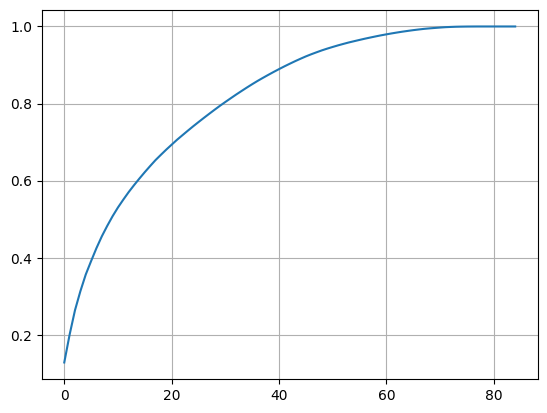

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()

In [ ]:
print(f"Variance preserved by 70 components: {np.round(np.cumsum(pca.explained_variance_ratio_)[70],3)*100}%")

Variance preserved by 70 components: 99.7%


- <p style="color:darkgreen">From the above plot it is clear that approximately 70 components preserve 95% of information.</p>

In [ ]:
#Again performing pca with 70 components
pca = PCA(n_components=70)
pca.fit(x_train)
x_train_pca  = pca.transform(x_train)
x_val_pca  = pca.transform(x_val)
x_test_pca  = pca.transform(x_test)

In [ ]:
print(f"x_train: {x_train.shape}")
print(f"x_train_vif: {x_train_vif.shape}")
print(f"x_train_pca: {x_train_pca.shape}")

x_train: (3349, 85)
x_train_vif: (3349, 73)
x_train_pca: (3349, 70)


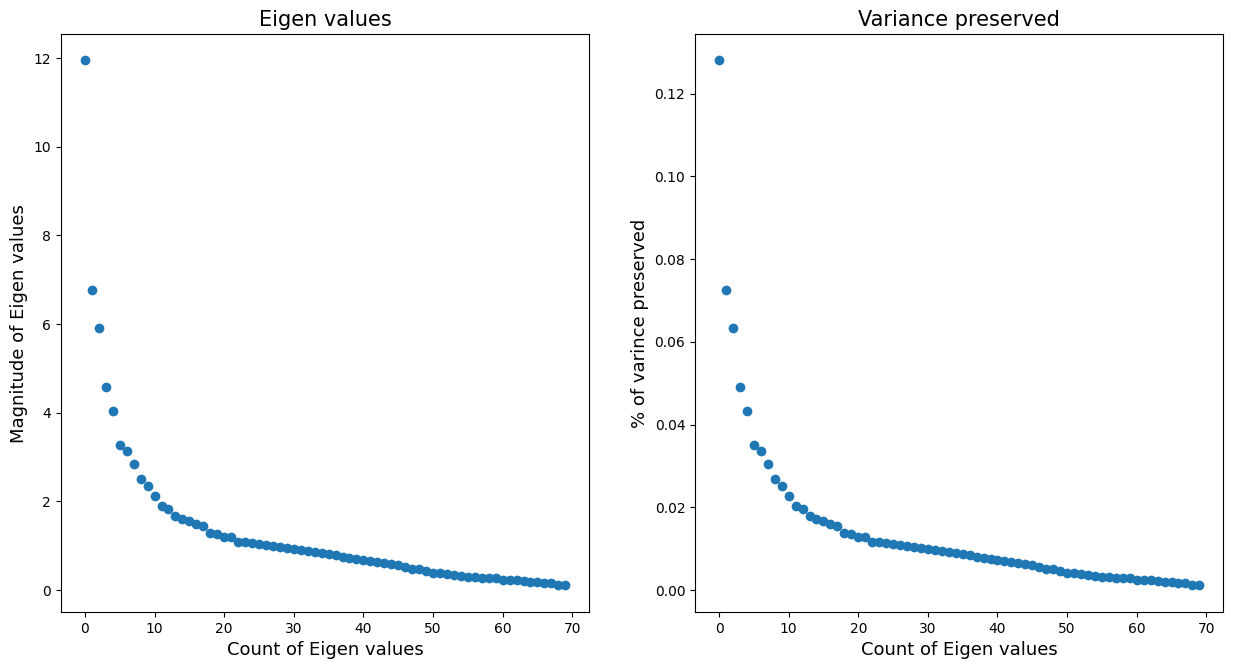

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,7.5))

ax[0].scatter(range(len(pca.explained_variance_)),pca.explained_variance_)
ax[0].set_xlabel('Count of Eigen values', fontsize=13)
ax[0].set_ylabel('Magnitude of Eigen values', fontsize=13)
ax[0].set_title('Eigen values', fontsize=15)

ax[1].scatter(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
ax[1].set_xlabel('Count of Eigen values', fontsize=13)
ax[1].set_ylabel('% of varince preserved', fontsize=13)
ax[1].set_title('Variance preserved', fontsize=15)
plt.show()

- <p style="color:darkgreen">The difference between the eigen values is not large. This might imply that these may not be more useful compared to features before transforming.</p>
- <p style="color:darkgreen">Most of the eigen values are close to zero and the variance explaned by them is also less than 2%.</p>

<h2>Modelling on the transformed data(PCA) </h2>

<h3>SGDRegressor</h3>

In [ ]:
parameters = {"alpha":[0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
              'epsilon':[0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

sgd_reg_pca = ml_models(SGDRegressor(random_state=30), parameters, x_train_pca , y_train, x_val_pca , y_val)
# y_test_pred_sgd_reg  = sgd_reg.predict(x_test_vif)

RandomizedSearchCV(estimator=SGDRegressor(random_state=30),
                   param_distributions={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5,
                                                  1, 5, 10],
                                        'epsilon': [0.001, 0.01, 0.05, 0.1, 0.5,
                                                    1, 5, 10]},
                   random_state=30, scoring='r2')
Model: SGDRegressor(random_state=30)
Best parameters : {'epsilon': 0.001, 'alpha': 0.5} 
Best score	: 0.606264970020925 
Best_estimator  : SGDRegressor(alpha=0.5, epsilon=0.001, random_state=30)

Coefficient of determination(R2) on train dataset SGDRegressor : 0.6198069515211362
Coefficient of determination(R2) on val dataset   SGDRegressor : 0.5671248787233287


<h3>DecisionTree</h3>

In [ ]:
parameters = {'max_depth':[*range(1,10)],
              'min_samples_split':[*range(50,110,10)],
              "max_features":["auto", "sqrt", "log2","None"],
              "max_leaf_nodes":[*range(1,5)],
              'min_samples_leaf': [*range(1,4)],
              'min_samples_split': [*range(1,4)]}
              
dt_pca = ml_models(DecisionTreeRegressor(random_state=30), parameters, x_train_pca, y_train, x_val_pca , y_val)
# y_test_pred_dt  = dt.predict(x_test)

RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=30),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         'None'],
                                        'max_leaf_nodes': [1, 2, 3, 4],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3]},
                   random_state=30, scoring='r2')
Model: DecisionTreeRegressor(random_state=30)
Best parameters : {'min_samples_split': 2, 'min_samples_leaf': 3, 'max_leaf_nodes': 4, 'max_features': 'auto', 'max_depth': 7} 
Best score	: 0.3188246604167716 
Best_estimator  : DecisionTreeRegressor(max_depth=7, max_features='auto', max_leaf_nodes=4,
                      min_samples_leaf=3, random_state=30)

Coefficient of determin

<h3>RandomForest</h3>

In [ ]:
parameters = {'n_estimators':[*range(40)],
              'max_depth':[*range(8,15)],
              'min_samples_split':[*range(20,35)],
              'min_samples_leaf':[*range(20,30)]}
              
rf_pca = ml_models(RandomForestRegressor(), parameters, x_train_pca, y_train, x_val_pca , y_val)
# y_test_pred_rf  = rf.predict(x_test)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [8, 9, 10, 11, 12, 13, 14],
                                        'min_samples_leaf': [20, 21, 22, 23, 24,
                                                             25, 26, 27, 28,
                                                             29],
                                        'min_samples_split': [20, 21, 22, 23,
                                                              24, 25, 26, 27,
                                                              28, 29, 30, 31,
                                                              32, 33, 34],
                                        'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
          

<h3>XGBoost</h3>

In [ ]:
parameters = {"n_estimators":[*range(100,200)],
          "max_depth":[*range(1,4)],
          "max_leaves":[*range(1,21)],
          "learning_rate":[*np.arange(0.1,0.5,0.005)],
          'subsample':[*np.arange(0.1,0.5,0.1)],
        #   "tree_method":['gpu_hist'],
          "alpha":[*range(3)],
          "lambda":[*range(1,5)],
          'colsample_bytree':[0.5], 'colsample_bylevel':[0.5], 'colsample_bynode':[0.5]}
xgb_pca = ml_models(XGBRegressor(objective ='reg:squarederror',random_state=30), parameters, x_train_pca, y_train, x_val_pca, y_val)
# y_test_pred_xgb  = xgb.predict(x_test)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                                          0.23500000000000013,
                                                

<h3>VotingRegressor</h3>

In [ ]:
vr_pca = VotingRegressor([('rf', rf_pca), ('dt',dt_pca), ('xgb', xgb_pca)])
vr_pca.fit(x_train_pca, y_train)

print(f"Coefficient of determination(R2) on train dataset through VotingRegressor :{vr_pca.score(x_train_pca , y_train)}")
print(f"Coefficient of determination(R2) on val dataset through VotingRegressor   :{vr_pca.score(x_val_pca , y_val)}")
# y_test_pred_vr = vr.predict(x_test_pca)

Coefficient of determination(R2) on train dataset through VotingRegressor :0.6171827469722169
Coefficient of determination(R2) on val dataset through VotingRegressor   :0.5021028042515179


<h3>train and val score (PCA)</h3>

In [ ]:
tab3 = PrettyTable()
tab3.title = 'R2 values after performing PCA'
tab3.field_names= ['Model', 'train score ', ' val score']
tab3.add_row(['SGDRegressor', np.round(sgd_reg_pca.score(x_train_pca , y_train),4), np.round(sgd_reg_pca.score(x_val_pca , y_val),4)])
tab3.add_row(['DecisionTreeRegressor', np.round(dt_pca.score(x_train_pca , y_train),4), np.round(dt_pca.score(x_val_pca , y_val),4)])
tab3.add_row(['RandomForestRegressor', np.round(rf_pca.score(x_train_pca, y_train),4), np.round(rf_pca.score(x_val_pca , y_val),4)])
tab3.add_row(['XGBRegressor', np.round(xgb_pca.score(x_train_pca , y_train),4), np.round(xgb_pca.score(x_val_pca , y_val),4)])
tab3.add_row(['VotingRegressor', np.round(vr_pca.score(x_train_pca , y_train),4), np.round(vr_pca.score(x_val_pca , y_val),4)])
print(tab3)

+-----------------------+--------------+------------+
|         Model         | train score  |  val score |
+-----------------------+--------------+------------+
|      SGDRegressor     |    0.6198    |   0.5671   |
| DecisionTreeRegressor |    0.3386    |   0.2889   |
| RandomForestRegressor |    0.6849    |   0.5138   |
|      XGBRegressor     |    0.657     |   0.5382   |
|    VotingRegressor    |    0.6172    |   0.5021   |
+-----------------------+--------------+------------+


# <h1>Conclusion</h1>

In [ ]:
# print(tab1)
print()
print(tab2)
print()
# print(tab3)
print()


+-----------------------+--------------+------------+
|         Models        | train score  |  val score |
+-----------------------+--------------+------------+
|      SGDRegressor     |    0.6208    |   0.5674   |
| RandomForestRegressor |    0.6934    |   0.5903   |
| DecisionTreeRegressor |    0.6321    |   0.603    |
|     LassoRegressor    |    0.6563    |   0.609    |
|      XGBRegressor     |    0.6576    |   0.6003   |
|    VotingRegressor    |    0.6712    |   0.6054   |
+-----------------------+--------------+------------+




- For all the binary features exponent is applied, to remove all the zero from the dataset. Which has improved the performance signigicantly.It also solved the problem of few featues in train datset having all zeros but present in train dataset.

<br>

- Important features from RandomForestRegressor
    - Features obtained from RandomForestRegressor are turned out to be more useful in predicting target variable.
    - CV score : 0.6348
    - Train score : 0.6168

- Imporatant Features + No HIGH VIF features
    - CV score : 0.6184
    - Train score : 0.6096

- PCA on important features
    - CV score : 0.5101
    - train score : 0.5809
    - These features are also overfitting the model even after hyperparameter tuning.
    - This might be due the presence of eigen values close to zero.

In [ ]:
train_df.head(3)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
train_x0 = le.fit_transform(train_df["X0"])

In [ ]:
km = KMeans(n_clusters=8)
cl = km.fit_predict(train_x0.reshape(-1, 1))

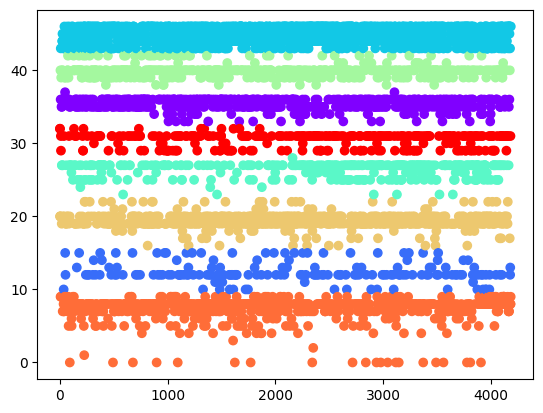

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(range(1, cl.shape[0]+1), train_x0, c=km.labels_, cmap='rainbow')
plt.show()

In [ ]:
km.labels_[:10]

array([7, 7, 5, 5, 5, 4, 6, 0, 2, 7], dtype=int32)

In [ ]:
le = LabelEncoder()
train_x0 = le.fit_transform(train_df["X0"]) 

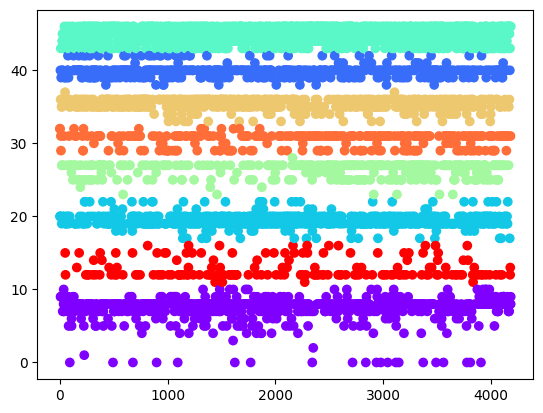

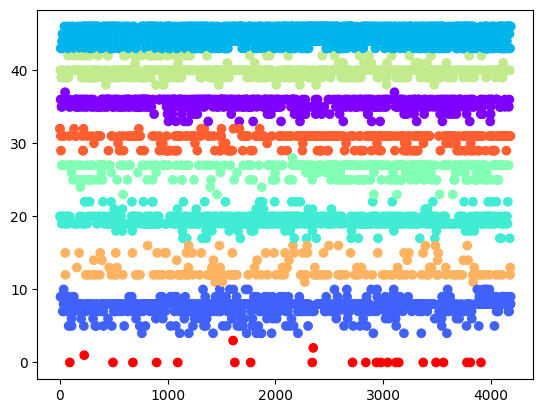

In [ ]:
for i in range(8,10):   
    km = KMeans(n_clusters=i)
    cl = km.fit_predict(train_x0.reshape(-1, 1))
    plt.scatter(range(1, cl.shape[0]+1), train_x0, c=km.labels_, cmap='rainbow')
    plt.show()

In [ ]:
train_df.X0.shape

(4187,)

In [ ]:
cl.shape

(4187,)

In [ ]:
cl

array([7, 7, 3, ..., 1, 1, 2], dtype=int32)

In [ ]:
train_df['X0_le'] = cl

In [ ]:
'X0_le' in list(train_df.columns)

True

In [ ]:
test_df['X0_le'] = km.predict(test_df.X0.values.reshape(-1,1))

In [ ]:
test_df['X0_le'].values

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)